In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn import metrics

In [172]:
hd = pd.read_csv("./heart.csv")

Head and Describe

In [173]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [174]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for null values and found none

In [175]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [176]:
hd.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

Checking for duplicates and removing the duplicates

In [177]:
hd.index[hd.duplicated()]

Int64Index([  15,   31,   43,   55,   61,   64,   79,   82,   83,   84,
            ...
            1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024],
           dtype='int64', length=723)

In [178]:
hd.duplicated().sum()

723

In [179]:
hd.drop(axis="rows", labels=hd.index[hd.duplicated()], inplace=True)
hd.count()

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

Remove skew

In [180]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [181]:
hd["trestbps"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

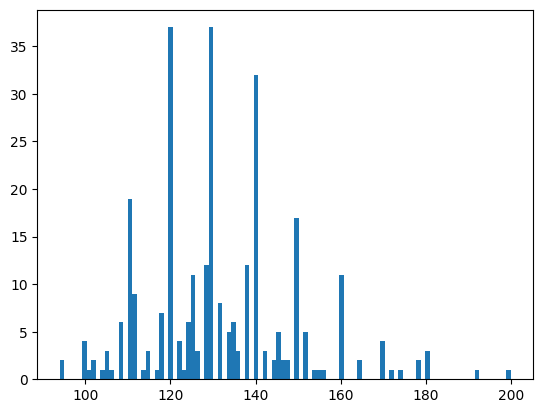

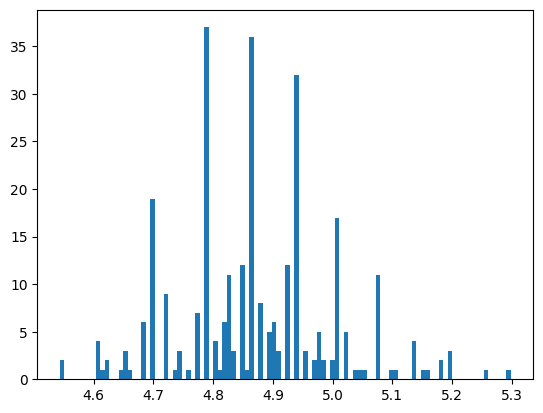

In [182]:
plt.hist(hd["trestbps"], bins=100)
plt.show()
hd["trestbps"] = np.log(hd["trestbps"])
plt.hist(hd["trestbps"], bins=100)
plt.show()

standardization of the data

In [183]:
y = hd["target"]
hd = hd.drop(columns=["target"])


In [184]:

hd = (hd - hd.mean())/(hd.std())
hd.insert(len(hd.columns),"target",y )



Remove outliers

In [185]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,0.681525,-0.933658,-0.329049,-0.666622,-0.417753,0.900163,0.804700,-0.697187,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,0.681525,-0.933658,0.540256,-0.840523,2.385833,-1.000880,0.237102,1.429586,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,0.681525,-0.933658,0.809430,-1.400872,-0.417753,0.900163,-1.072740,1.429586,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,0.681525,-0.933658,0.966514,-0.840523,-0.417753,0.900163,0.499070,-0.697187,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,-1.462439,-0.933658,0.429885,0.917813,2.385833,0.900163,-1.902307,-0.697187,0.737829,-0.644764,2.266164,-0.513143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-1.462439,1.004244,-0.642180,-0.685944,-0.417753,-1.000880,-1.509354,-0.697187,0.393433,-0.644764,-0.713727,-0.513143,1
733,-1.151698,-1.462439,1.004244,-1.450365,-2.038510,-0.417753,0.900163,1.110330,-0.697187,-0.381459,-0.644764,-0.713727,-0.513143,1
739,-0.267522,0.681525,-0.933658,-0.147128,0.164240,-0.417753,0.900163,0.499070,1.429586,-0.898054,0.977891,0.279570,1.118111,0
843,0.506132,0.681525,1.973195,1.564530,0.512043,-0.417753,-1.000880,-1.072740,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,0


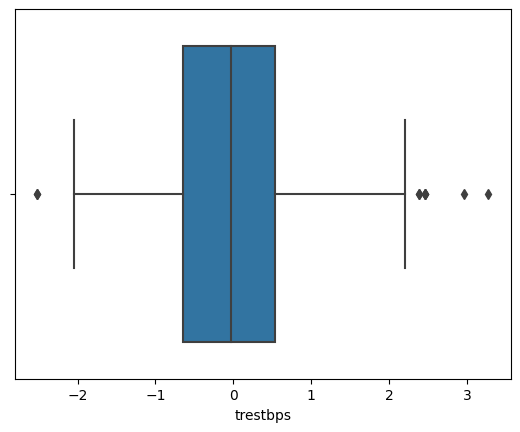

In [186]:
sns.boxplot(x=hd["trestbps"])
plt.show()

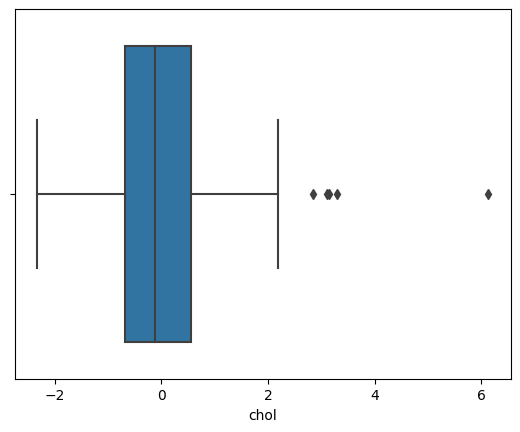

In [187]:
sns.boxplot(x=hd["chol"])
plt.show()

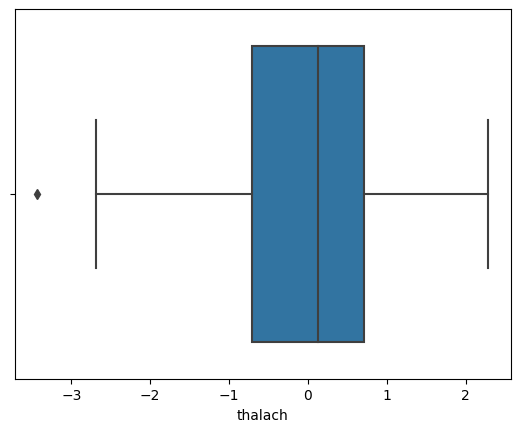

In [188]:
sns.boxplot(x=hd["thalach"])
plt.show()

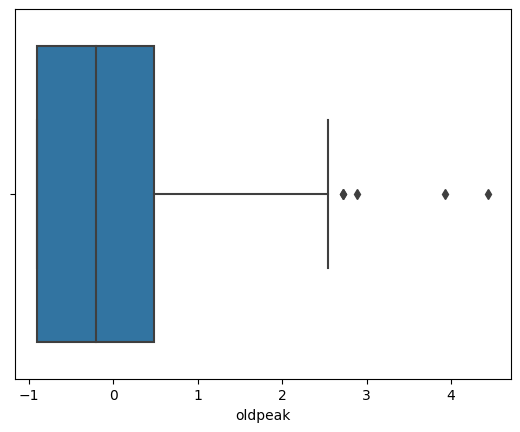

In [189]:
sns.boxplot(x=hd["oldpeak"])
plt.show()

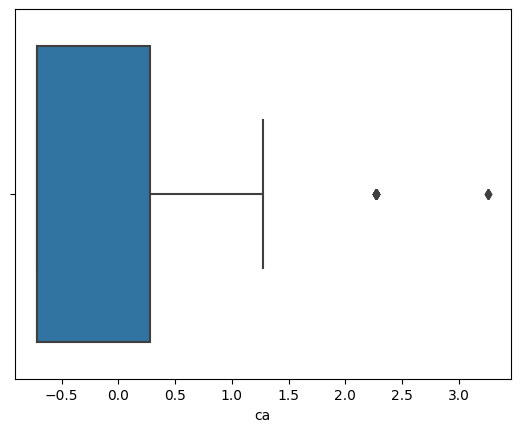

In [190]:
sns.boxplot(x=hd["ca"])
plt.show()

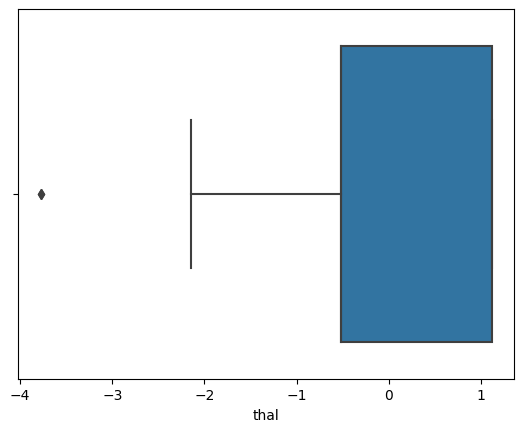

In [191]:
sns.boxplot(x=hd["thal"])
plt.show()

In [192]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

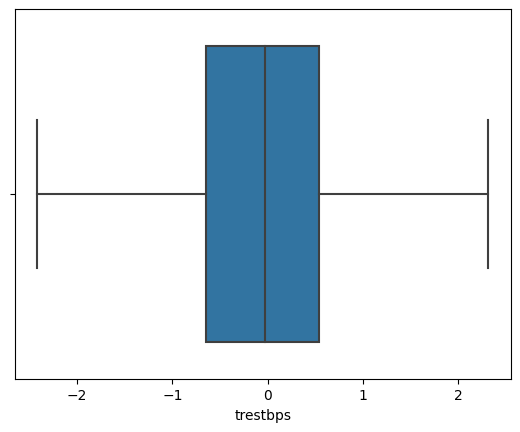

In [193]:
outlier1 = OutlierRemoval(hd["trestbps"].quantile(0.25), hd["trestbps"].quantile(0.75))
t1 = hd["trestbps"].apply(outlier1.removeOutlier)
hd["trestbps"] = t1
sns.boxplot(x=hd["trestbps"])
plt.show()

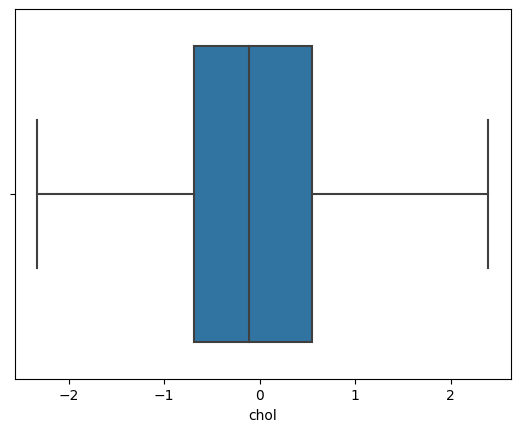

In [194]:
outlier2 = OutlierRemoval(hd["chol"].quantile(0.25), hd["chol"].quantile(0.75))
t2 = hd["chol"].apply(outlier2.removeOutlier)
hd["chol"] = t2
sns.boxplot(x=hd["chol"])
plt.show()

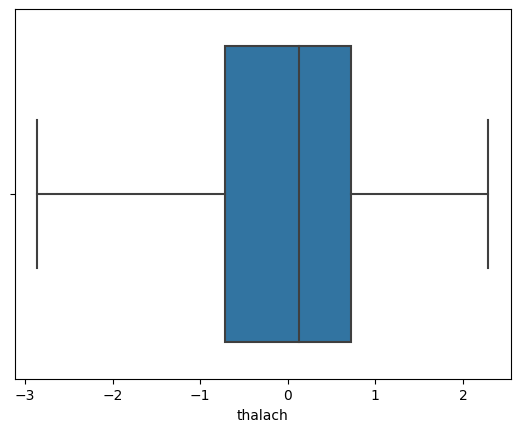

In [195]:
outlier3 = OutlierRemoval(hd["thalach"].quantile(0.25), hd["thalach"].quantile(0.75))
t3 = hd["thalach"].apply(outlier3.removeOutlier)
hd["thalach"] = t3
sns.boxplot(x=hd["thalach"])
plt.show()

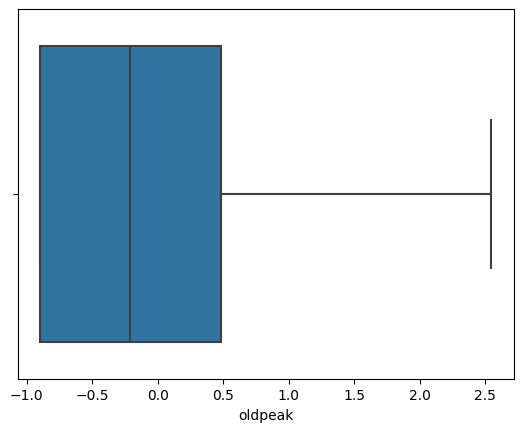

In [196]:
outlier4 = OutlierRemoval(hd["oldpeak"].quantile(0.25), hd["oldpeak"].quantile(0.75))
t4 = hd["oldpeak"].apply(outlier4.removeOutlier)
hd["oldpeak"] = t4
sns.boxplot(x=hd["oldpeak"])
plt.show()

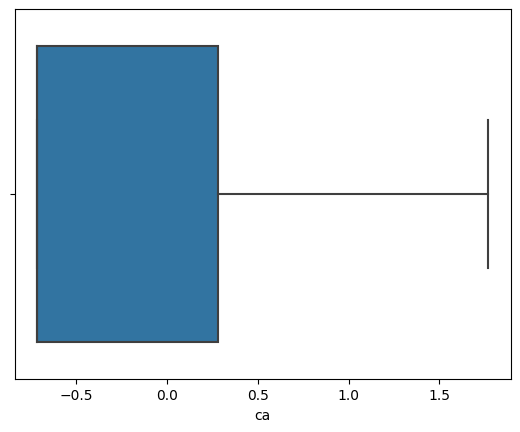

In [197]:
outlier5 = OutlierRemoval(hd["ca"].quantile(0.25), hd["ca"].quantile(0.75))
t5 = hd["ca"].apply(outlier5.removeOutlier)
hd["ca"] = t5
sns.boxplot(x=hd["ca"])
plt.show()

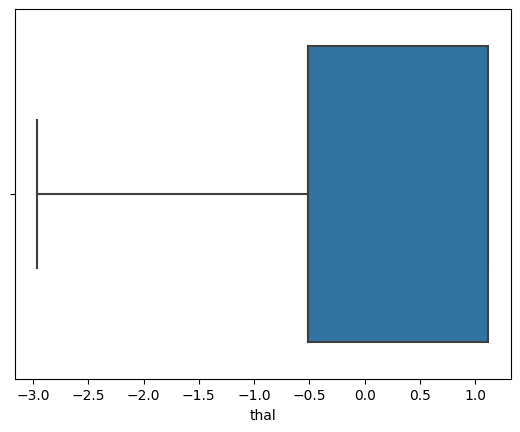

In [198]:
outlier6 = OutlierRemoval(hd["thal"].quantile(0.25), hd["thal"].quantile(0.75))
t6 = hd["thal"].apply(outlier6.removeOutlier)
hd["thal"] = t6
sns.boxplot(x=hd["thal"])
plt.show()

In [199]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,0.681525,-0.933658,-0.329049,-0.666622,-0.417753,0.900163,0.804700,-0.697187,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,0.681525,-0.933658,0.540256,-0.840523,2.385833,-1.000880,0.237102,1.429586,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,0.681525,-0.933658,0.809430,-1.400872,-0.417753,0.900163,-1.072740,1.429586,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,0.681525,-0.933658,0.966514,-0.840523,-0.417753,0.900163,0.499070,-0.697187,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,-1.462439,-0.933658,0.429885,0.917813,2.385833,0.900163,-1.902307,-0.697187,0.737829,-0.644764,1.769516,-0.513143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-1.462439,1.004244,-0.642180,-0.685944,-0.417753,-1.000880,-1.509354,-0.697187,0.393433,-0.644764,-0.713727,-0.513143,1
733,-1.151698,-1.462439,1.004244,-1.450365,-2.038510,-0.417753,0.900163,1.110330,-0.697187,-0.381459,-0.644764,-0.713727,-0.513143,1
739,-0.267522,0.681525,-0.933658,-0.147128,0.164240,-0.417753,0.900163,0.499070,1.429586,-0.898054,0.977891,0.279570,1.118111,0
843,0.506132,0.681525,1.973195,1.564530,0.512043,-0.417753,-1.000880,-1.072740,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,0


Correlation matrix

In [200]:
c=hd.corr()
ct = abs(c["target"])
rf = ct[ct>0.15]
rf


age        0.221476
sex        0.283609
cp         0.432080
thalach    0.420408
exang      0.435601
oldpeak    0.435099
slope      0.343940
ca         0.447434
thal       0.350021
target     1.000000
Name: target, dtype: float64

<AxesSubplot:>

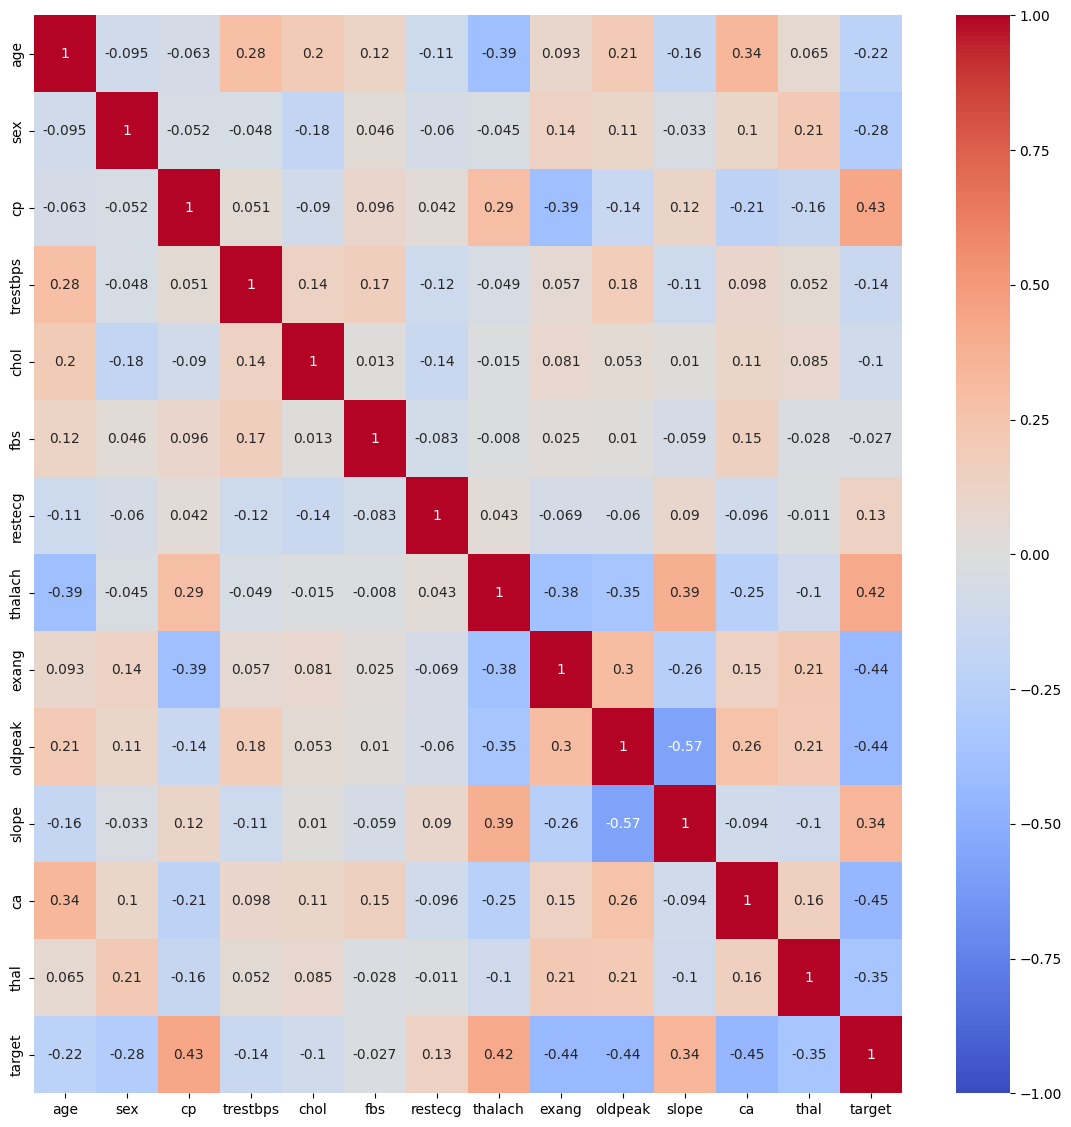

In [201]:
plt.figure(figsize=(14,14))
sns.heatmap(hd.corr(), vmin=-1, cmap="coolwarm", annot=True)

Done with preprocessing and can start with the classification.

Checking number of classes

In [202]:
hd["target"].unique()

array([0, 1])

In [203]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,0.681525,-0.933658,-0.329049,-0.666622,-0.417753,0.900163,0.804700,-0.697187,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,0.681525,-0.933658,0.540256,-0.840523,2.385833,-1.000880,0.237102,1.429586,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,0.681525,-0.933658,0.809430,-1.400872,-0.417753,0.900163,-1.072740,1.429586,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,0.681525,-0.933658,0.966514,-0.840523,-0.417753,0.900163,0.499070,-0.697187,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,-1.462439,-0.933658,0.429885,0.917813,2.385833,0.900163,-1.902307,-0.697187,0.737829,-0.644764,1.769516,-0.513143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-1.462439,1.004244,-0.642180,-0.685944,-0.417753,-1.000880,-1.509354,-0.697187,0.393433,-0.644764,-0.713727,-0.513143,1
733,-1.151698,-1.462439,1.004244,-1.450365,-2.038510,-0.417753,0.900163,1.110330,-0.697187,-0.381459,-0.644764,-0.713727,-0.513143,1
739,-0.267522,0.681525,-0.933658,-0.147128,0.164240,-0.417753,0.900163,0.499070,1.429586,-0.898054,0.977891,0.279570,1.118111,0
843,0.506132,0.681525,1.973195,1.564530,0.512043,-0.417753,-1.000880,-1.072740,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,0


In [204]:
def train_test_data(hd):

    shuffle_df = hd.sample(frac=1)
    train_set = shuffle_df[:int(0.9 * len(hd))]
    X_train = train_set.drop(columns=["target"])
    Y_train = train_set["target"]
    
    shuffle_df = hd.sample(frac=1)
    test_set = shuffle_df[int(0.9*len(hd)):]
    X_test = test_set.drop(columns=["target"])
    Y_test = test_set["target"]


    return X_train, Y_train, X_test, Y_test


Multivariate logistic regression

In [205]:
X_train, Y_train, X_test, Y_test = train_test_data(hd)

In [206]:
ones = np.ones([X_train.shape[0],1])
X_train.insert(0,'ones', ones )
ones = np.ones([X_test.shape[0],1])
X_test.insert(0,'ones', ones )

X_test


,ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
122,1.0,0.616654,0.681525,-0.933658,0.809430,0.685944,-0.417753,-1.000880,-0.330497,1.429586,1.512721,-0.644764,1.272867,1.118111
168,1.0,-1.262220,0.681525,1.004244,-0.028200,1.323582,-0.417753,0.900163,0.542731,-0.697187,0.737829,0.977891,0.279570,-0.513143
179,1.0,0.174566,-1.462439,-0.933658,0.204262,2.393558,-0.417753,-1.000880,0.018795,1.429586,0.737829,-0.644764,1.272867,1.118111
616,1.0,-1.262220,0.681525,-0.933658,-0.968641,1.091714,-0.417753,0.900163,1.372298,-0.697187,0.135136,-0.644764,-0.713727,-0.513143
437,1.0,1.390309,0.681525,-0.933658,-0.642180,-0.338141,-0.417753,-1.000880,-0.898095,1.429586,1.340523,-0.644764,1.272867,1.118111
332,1.0,-1.925352,0.681525,1.004244,-0.028200,0.067628,-0.417753,0.900163,1.634266,-0.697187,2.115415,-2.267418,-0.713727,-0.513143
356,1.0,0.506132,0.681525,-0.933658,1.753938,-1.362227,2.385833,-1.000880,-2.600889,-0.697187,-0.037063,-0.644764,1.272867,-2.144396
173,1.0,-1.704308,-1.462439,1.004244,-2.415836,-0.917813,-0.417753,0.900163,1.284975,-0.697187,-0.898054,0.977891,-0.713727,-0.513143
41,1.0,-0.046478,0.681525,1.004244,-0.642180,0.222207,-0.417753,-1.000880,-0.112190,-0.697187,-0.553657,-0.644764,-0.713727,1.118111
269,1.0,1.832397,-1.462439,1.004244,-1.309615,0.357464,2.385833,-1.000880,-0.854433,-0.697187,-0.898054,0.977891,0.279570,-0.513143


In [207]:
X_train

,ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,1.0,0.506132,-1.462439,-0.933658,2.207956,0.048306,-0.417753,0.900163,-0.286835,1.429586,-0.898054,-0.644764,-0.713727,-0.513143
708,1.0,0.616654,-1.462439,1.004244,-0.642180,-1.323582,2.385833,0.900163,-2.338921,-0.697187,-0.898054,0.977891,-0.713727,-0.513143
126,1.0,1.279787,0.681525,-0.933658,-0.642180,1.072391,-0.417753,-1.000880,0.062456,-0.697187,-0.553657,-0.644764,-0.713727,-0.513143
73,1.0,0.506132,0.681525,-0.933658,0.540256,-1.342905,-0.417753,0.900163,0.542731,1.429586,-0.898054,0.977891,0.279570,1.118111
131,1.0,-0.378044,-1.462439,1.004244,-0.028200,0.183563,-0.417753,-1.000880,-0.024867,-0.697187,-0.467558,0.977891,-0.713727,-0.513143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0,0.285088,0.681525,0.035293,-0.390661,0.280174,-0.417753,0.900163,-0.374158,-0.697187,-0.639756,0.977891,-0.713727,1.118111
146,1.0,-0.378044,-1.462439,1.004244,-0.642180,0.937135,-0.417753,-1.000880,0.324424,-0.697187,-0.381459,0.977891,-0.713727,-0.513143
154,1.0,0.948220,0.681525,-0.933658,-0.028200,1.613418,2.385833,-1.000880,-0.767111,1.429586,0.651730,0.977891,1.769516,1.118111
25,1.0,0.727176,-1.462439,-0.933658,0.809430,1.169003,-0.417753,-1.000880,-0.155851,1.429586,-0.037063,-0.644764,-0.713727,1.118111


Done wit alloting X and Y's along with training and testing datas

Functions

In [208]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [209]:
def compute_tp_tn_fn_fp(y_act, y_pred):
	'''
	True positive - actual = 1, predicted = 1
	False positive - actual = 1, predicted = 0
	False negative - actual = 0, predicted = 1
	True negative - actual = 0, predicted = 0
	'''
	tp = sum((y_act == 1) & (y_pred == 1))
	tn = sum((y_act == 0) & (y_pred == 0))
	fn = sum((y_act == 1) & (y_pred == 0))
	fp = sum((y_act == 0) & (y_pred == 1))
	return tp, tn, fp, fn

def compute_precision(tp, fp):
	'''
	Precision = TP  / FP + TP 

	'''
	return (tp  * 100)/ float( tp + fp)

def compute_recall(tp, fn):
	'''
	Recall = TP /FN + TP 

	'''
	return (tp  * 100)/ float( tp + fn)

def compute_f1_score(y_true, y_pred):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score



In [210]:
def compute_accuracy(y_true, y_pred):
    tp, tn, fn, fp = compute_tp_tn_fn_fp(y_true, y_pred)
    return ((tp + tn) * 100)/ float( tp + tn + fn + fp)

setting learning rate, no of iterations and W vector

In [211]:
learning_rate = 0.01
n = 1000
W = np.random.uniform(low = -5, high =10, size = len(X_train.columns))

predicting Y from train and test datas

In [212]:
for i in range(n):
    temp = sigmoid(X_train@W)
    gradient = X_train.T@(Y_train-temp)
    W = W + learning_rate*gradient 

class_prediction_train = np.array(sigmoid(X_train@W))

for i in range(len(class_prediction_train)):
    if(class_prediction_train[i] >= 0.5):
        class_prediction_train[i]=1
    else:
        class_prediction_train[i]=0

class_prediction_test = np.array(sigmoid(X_test@W))

for i in range(len(class_prediction_test)):
    if(class_prediction_test[i] >= 0.5):
        class_prediction_test[i]=1
    else:
        class_prediction_test[i]=0

from sklearn.metrics import mean_squared_error
# A = metrics.accuracy_score(Y_train, class_prediction_train)*100
# a11 = metrics.accuracy_score(Y_test, class_prediction_test)*100
A = compute_accuracy(np.array(Y_train),np.array(class_prediction_train))
a = compute_accuracy(np.array(Y_test),np.array(class_prediction_test))

Accuracy and f1 scores

In [213]:
# A

In [214]:
a

90.3225806451613

In [215]:
# a11

In [216]:
# F = metrics.f1_score(Y_train, class_prediction_train)
# f11 = metrics.f1_score(Y_test, class_prediction_test)
F = compute_f1_score(np.array(Y_train),np.array(class_prediction_train))
f = compute_f1_score(np.array(Y_test),np.array(class_prediction_test))

In [217]:
# F

In [218]:
f

0.9230769230769231

In [219]:
# f11

multivariate Bayes classification

Dividing X and Y  to class 1 and 0

In [220]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,0.681525,-0.933658,-0.329049,-0.666622,-0.417753,0.900163,0.804700,-0.697187,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,0.681525,-0.933658,0.540256,-0.840523,2.385833,-1.000880,0.237102,1.429586,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,0.681525,-0.933658,0.809430,-1.400872,-0.417753,0.900163,-1.072740,1.429586,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,0.681525,-0.933658,0.966514,-0.840523,-0.417753,0.900163,0.499070,-0.697187,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,-1.462439,-0.933658,0.429885,0.917813,2.385833,0.900163,-1.902307,-0.697187,0.737829,-0.644764,1.769516,-0.513143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.500831,-1.462439,1.004244,-0.642180,-0.685944,-0.417753,-1.000880,-1.509354,-0.697187,0.393433,-0.644764,-0.713727,-0.513143,1
733,-1.151698,-1.462439,1.004244,-1.450365,-2.038510,-0.417753,0.900163,1.110330,-0.697187,-0.381459,-0.644764,-0.713727,-0.513143,1
739,-0.267522,0.681525,-0.933658,-0.147128,0.164240,-0.417753,0.900163,0.499070,1.429586,-0.898054,0.977891,0.279570,1.118111,0
843,0.506132,0.681525,1.973195,1.564530,0.512043,-0.417753,-1.000880,-1.072740,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,0


In [221]:
X_train.insert(len(X_train.columns),"target",Y_train )
X_train


,ones,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,1.0,0.506132,-1.462439,-0.933658,2.207956,0.048306,-0.417753,0.900163,-0.286835,1.429586,-0.898054,-0.644764,-0.713727,-0.513143,0
708,1.0,0.616654,-1.462439,1.004244,-0.642180,-1.323582,2.385833,0.900163,-2.338921,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,1
126,1.0,1.279787,0.681525,-0.933658,-0.642180,1.072391,-0.417753,-1.000880,0.062456,-0.697187,-0.553657,-0.644764,-0.713727,-0.513143,1
73,1.0,0.506132,0.681525,-0.933658,0.540256,-1.342905,-0.417753,0.900163,0.542731,1.429586,-0.898054,0.977891,0.279570,1.118111,0
131,1.0,-0.378044,-1.462439,1.004244,-0.028200,0.183563,-0.417753,-1.000880,-0.024867,-0.697187,-0.467558,0.977891,-0.713727,-0.513143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0,0.285088,0.681525,0.035293,-0.390661,0.280174,-0.417753,0.900163,-0.374158,-0.697187,-0.639756,0.977891,-0.713727,1.118111,0
146,1.0,-0.378044,-1.462439,1.004244,-0.642180,0.937135,-0.417753,-1.000880,0.324424,-0.697187,-0.381459,0.977891,-0.713727,-0.513143,1
154,1.0,0.948220,0.681525,-0.933658,-0.028200,1.613418,2.385833,-1.000880,-0.767111,1.429586,0.651730,0.977891,1.769516,1.118111,0
25,1.0,0.727176,-1.462439,-0.933658,0.809430,1.169003,-0.417753,-1.000880,-0.155851,1.429586,-0.037063,-0.644764,-0.713727,1.118111,0


In [222]:
X_train  = X_train.drop(columns = ["ones"])
X_test  = X_test.drop(columns = ["ones"])
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,0.506132,-1.462439,-0.933658,2.207956,0.048306,-0.417753,0.900163,-0.286835,1.429586,-0.898054,-0.644764,-0.713727,-0.513143,0
708,0.616654,-1.462439,1.004244,-0.642180,-1.323582,2.385833,0.900163,-2.338921,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,1
126,1.279787,0.681525,-0.933658,-0.642180,1.072391,-0.417753,-1.000880,0.062456,-0.697187,-0.553657,-0.644764,-0.713727,-0.513143,1
73,0.506132,0.681525,-0.933658,0.540256,-1.342905,-0.417753,0.900163,0.542731,1.429586,-0.898054,0.977891,0.279570,1.118111,0
131,-0.378044,-1.462439,1.004244,-0.028200,0.183563,-0.417753,-1.000880,-0.024867,-0.697187,-0.467558,0.977891,-0.713727,-0.513143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.285088,0.681525,0.035293,-0.390661,0.280174,-0.417753,0.900163,-0.374158,-0.697187,-0.639756,0.977891,-0.713727,1.118111,0
146,-0.378044,-1.462439,1.004244,-0.642180,0.937135,-0.417753,-1.000880,0.324424,-0.697187,-0.381459,0.977891,-0.713727,-0.513143,1
154,0.948220,0.681525,-0.933658,-0.028200,1.613418,2.385833,-1.000880,-0.767111,1.429586,0.651730,0.977891,1.769516,1.118111,0
25,0.727176,-1.462439,-0.933658,0.809430,1.169003,-0.417753,-1.000880,-0.155851,1.429586,-0.037063,-0.644764,-0.713727,1.118111,0


splitting training data into 2 parts base don their outputs

In [223]:
X_train0 = X_train.loc[X_train.iloc[:,13] == 0]
X_train1 = X_train.loc[X_train.iloc[:,13] == 1]

In [224]:
X_train1 = X_train1.drop(columns=["target"])
X_train0 = X_train0.drop(columns=["target"])
X_train = X_train.drop(columns=["target"])

In [225]:
X0 = hd.loc[hd.iloc[:,13] == 0]
X1 = hd.loc[hd.iloc[:,13] == 1]
print(X1.count())
print(X0.count())

age         164
sex         164
cp          164
trestbps    164
chol        164
fbs         164
restecg     164
thalach     164
exang       164
oldpeak     164
slope       164
ca          164
thal        164
target      164
dtype: int64
age         138
sex         138
cp          138
trestbps    138
chol        138
fbs         138
restecg     138
thalach     138
exang       138
oldpeak     138
slope       138
ca          138
thal        138
target      138
dtype: int64


Finding the mean and variance for inputs corresponding to outputs 0 and 1

In [226]:
mean0=[]
mean1=[]
sigma0=[]
sigma1=[]

for i in X_train1:
    M1 = np.mean(X_train1[i].values)
    mean1.append(M1)

    S1 = np.std(X_train1[i].values)
    sigma1.append(S1)

for i in X_train0:
    M0 = np.mean(X_train0[i].values)
    mean0.append(M0)

    S0 = np.std(X_train0[i].values)
    sigma0.append(S0)



In [227]:

sigma0

[0.863095597788901,
 0.81904400095652,
 0.8468144758843321,
 0.964974424619106,
 0.9369416682058067,
 1.0311548363150198,
 1.0374220164510375,
 0.9559237691545243,
 1.056587109596071,
 1.0306296222612832,
 0.9304820783706127,
 0.90609415734403,
 1.1011793471817573]

In [228]:
def probability(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

In [229]:
X_train0.shape[0]

124

train and test output predictions

In [230]:

P0 = X_train0.shape[0]/X_train0.shape[0] + X_train1.shape[0]
P1 = X_train1.shape[0]/X_train0.shape[0] + X_train1.shape[0]

Y_train_pred = []
for i in range(X_train.shape[0]):
    p0_train = P0
    p1_train = P1
    for j in range(X_train.shape[1]):
        xij = X_train.iat[i,j]
        p0_train *= probability(mean0[j], sigma0[j], xij)
        p1_train *= probability(mean1[j], sigma1[j], xij)
    if(p0_train > p1_train):
        Y_train_pred.append(0)
    else:
        Y_train_pred.append(1)

Y_test_pred = []
for i in range(X_test.shape[0]):
    p0_test = P0
    p1_test = P1
    for j in range(X_test.shape[1]):
        xij1 = X_test.iat[i,j]
        p0_test *= probability(mean0[j], sigma0[j], xij1)
        p1_test *= probability(mean1[j], sigma1[j], xij1)
    if(p0_test > p1_test):
        Y_test_pred.append(0)
    else:
        Y_test_pred.append(1)

Accuracy and F1 scores

In [231]:
# A11 =  metrics.accuracy_score(Y_train, Y_train_pred)*100
# F11 = metrics.f1_score(Y_train, Y_train_pred)
A = compute_accuracy(np.array(Y_train),np.array(Y_train_pred))
F = compute_f1_score(np.array(Y_train),np.array(Y_train_pred))

In [232]:
a11 =  metrics.accuracy_score(Y_test, Y_test_pred)*100
f11 = metrics.f1_score(Y_test, Y_test_pred)
a = compute_accuracy(np.array(Y_test),np.array(Y_test_pred))
f = compute_f1_score(np.array(Y_test),np.array(Y_test_pred))

In [233]:
f

0.8947368421052632

In [234]:
# f11

In [235]:
a

87.09677419354838

In [236]:
# a11

Univariate classification

logistic regression

In [237]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,0.506132,-1.462439,-0.933658,2.207956,0.048306,-0.417753,0.900163,-0.286835,1.429586,-0.898054,-0.644764,-0.713727,-0.513143
708,0.616654,-1.462439,1.004244,-0.642180,-1.323582,2.385833,0.900163,-2.338921,-0.697187,-0.898054,0.977891,-0.713727,-0.513143
126,1.279787,0.681525,-0.933658,-0.642180,1.072391,-0.417753,-1.000880,0.062456,-0.697187,-0.553657,-0.644764,-0.713727,-0.513143
73,0.506132,0.681525,-0.933658,0.540256,-1.342905,-0.417753,0.900163,0.542731,1.429586,-0.898054,0.977891,0.279570,1.118111
131,-0.378044,-1.462439,1.004244,-0.028200,0.183563,-0.417753,-1.000880,-0.024867,-0.697187,-0.467558,0.977891,-0.713727,-0.513143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.285088,0.681525,0.035293,-0.390661,0.280174,-0.417753,0.900163,-0.374158,-0.697187,-0.639756,0.977891,-0.713727,1.118111
146,-0.378044,-1.462439,1.004244,-0.642180,0.937135,-0.417753,-1.000880,0.324424,-0.697187,-0.381459,0.977891,-0.713727,-0.513143
154,0.948220,0.681525,-0.933658,-0.028200,1.613418,2.385833,-1.000880,-0.767111,1.429586,0.651730,0.977891,1.769516,1.118111
25,0.727176,-1.462439,-0.933658,0.809430,1.169003,-0.417753,-1.000880,-0.155851,1.429586,-0.037063,-0.644764,-0.713727,1.118111


selected a feature for classification

In [238]:
train_X = X_train.iloc[:,11:12]
ones = np.ones([train_X.shape[0],1])
train_X.insert(0,'ones', ones )

test_X = X_test.iloc[:,11:12]
ones = np.ones([test_X.shape[0],1])
test_X.insert(0,'ones', ones )
test_X

,ones,ca
122,1.0,1.272867
168,1.0,0.279570
179,1.0,1.272867
616,1.0,-0.713727
437,1.0,1.272867
332,1.0,-0.713727
356,1.0,1.272867
173,1.0,-0.713727
41,1.0,-0.713727
269,1.0,0.279570


Gradient descent 

In [239]:
w = np.random.uniform(low = -5, high =10, size = len(train_X.columns))

for i in range(n):
    temp1 = sigmoid(train_X@w)
    gradient1 = train_X.T@(Y_train-temp1)
    w = w + learning_rate*gradient1 

predicting y values for training and test datas

In [240]:
class_prediction_train1 = np.array(sigmoid(train_X@w))

for i in range(len(class_prediction_train1)):
    if(class_prediction_train1[i] >= 0.5):
        class_prediction_train1[i]=1
    else:
        class_prediction_train1[i]=0

class_prediction_test1 = np.array(sigmoid(test_X@w))

for i in range(len(class_prediction_test1)):
    if(class_prediction_test1[i] >= 0.5):
        class_prediction_test1[i]=1
    else:
        class_prediction_test1[i]=0

F1 and Accuracy values

In [241]:
# A11 = metrics.accuracy_score(Y_train, class_prediction_train1)*100
# a11 = metrics.accuracy_score(Y_test, class_prediction_test1)*100

A1 = compute_accuracy(np.array(Y_train),np.array(class_prediction_train1))
a1 = compute_accuracy(np.array(Y_test),np.array(class_prediction_test1))

In [242]:
# A1

In [243]:
a1

80.64516129032258

In [244]:
# F11 = metrics.f1_score(Y_train, class_prediction_train1)
# f11 = metrics.f1_score(Y_test, class_prediction_test1)

F1 = compute_f1_score(np.array(Y_train),np.array(class_prediction_train1))
f1 = compute_f1_score(np.array(Y_test),np.array(class_prediction_test1))

In [245]:
# F1

In [246]:
f1

0.8333333333333333

Naive Bayes

Finding mean and standard deviation for the feature chosen

In [247]:
train_X1 = X_train1.iloc[:,11:12]
train_X0 = X_train0.iloc[:,11:12]

nu1 = np.mean(np.array(train_X1))
nu0 = np.mean(np.array(train_X0))

sig1 = np.std(np.array(train_X1))
sig0 = np.std(np.array(train_X0))


In [248]:
train_X

,ones,ca
87,1.0,-0.713727
708,1.0,-0.713727
126,1.0,-0.713727
73,1.0,0.279570
131,1.0,-0.713727
...,...,...
237,1.0,-0.713727
146,1.0,-0.713727
154,1.0,1.769516
25,1.0,-0.713727


Predicting Y values for training and test data sets

In [249]:
Y_train_pred1 = []

for i in range(X_train.shape[0]):
    p0_traint = P0
    p1_traint = P1
    # print(p0_traint)
    # print(p1_traint)
    p0_traint *= probability(nu0,sig0,train_X.iat[i,1])
    p1_traint *= probability(nu1,sig1,train_X.iat[i,1])
    if(p1_traint > p0_traint):
        Y_train_pred1.append(1)
    else:
        Y_train_pred1.append(0)


Y_test_pred1 = []

for i in range(X_test.shape[0]):
    p0_testt = P0
    p1_testt = P1
    p0_testt *= probability(nu0,sig0,test_X.iat[i,1])
    p1_testt *= probability(nu1,sig1,test_X.iat[i,1])
    if(p0_testt > p1_testt):
        Y_test_pred1.append(0)
    else:
        Y_test_pred1.append(1)   
len(Y_train_pred1)

271

Accuracy and F1 values calculation

In [250]:
# A11 = metrics.accuracy_score(Y_train, Y_train_pred1)*100
# a11 = metrics.accuracy_score(Y_test, Y_test_pred1)*100

A1 = compute_accuracy(np.array(Y_train),np.array(Y_train_pred1))
a1 = compute_accuracy(np.array(Y_test),np.array(Y_test_pred1))

In [251]:
# A1

In [252]:
a1

80.64516129032258

In [253]:
# F11 = metrics.f1_score(Y_train, Y_train_pred1)
# f11 = metrics.f1_score(Y_test, Y_test_pred1)

F1 = compute_f1_score(np.array(Y_train),np.array(Y_train_pred1))
f1 = compute_f1_score(np.array(Y_test),np.array(Y_test_pred1))

In [254]:
# F1

In [255]:
f1

0.8333333333333333